### Import Libraries

In [52]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mso
import tensorflow_hub as hub
import logging
logging.basicConfig(level=logging.INFO)

### Loading datasets and checking the datasets

In [3]:
True_data = pd.read_csv('True.csv')
Fake_data = pd.read_csv('Fake.csv')
True_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
Fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
True_data.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [6]:
Fake_data.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [7]:
True_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
Fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


<AxesSubplot:>

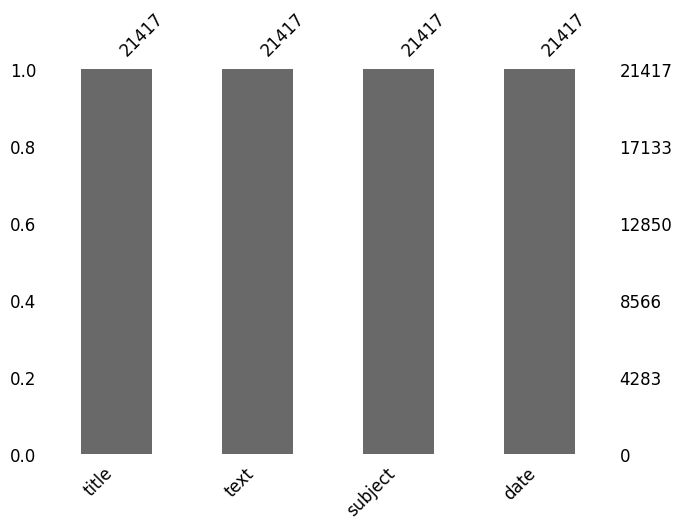

In [11]:
plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(True_data,ax=ax_train,fontsize = 12)

<AxesSubplot:>

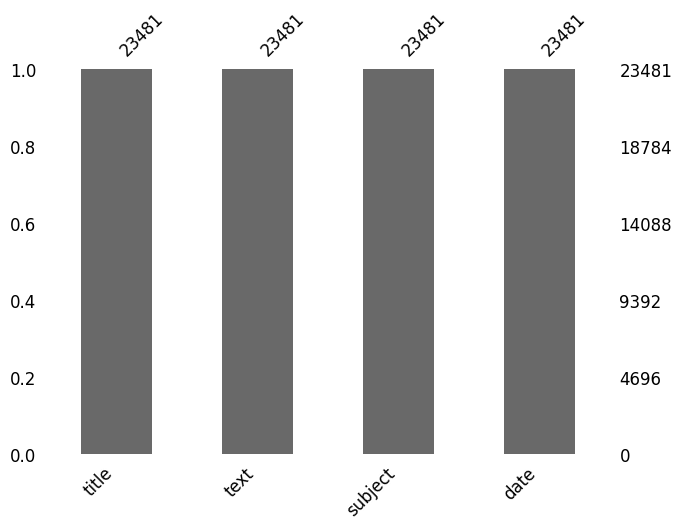

In [12]:
plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(Fake_data,ax=ax_train,fontsize = 12)

### Data Preprocessing and Exploration

In [13]:
### Labeling dataset
True_data['label']=0
Fake_data['label']=1
True_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [14]:
### We then remove non alphanumeric characters as well as converting to all lower case from the text.

import re
def clean_txt(text):
    text = re.sub("'", "", text)
    text = re.sub("(\\W)+", " ", text)
    text = text.lower()
    return text

True_data['text']=True_data['text'].apply(clean_txt)
Fake_data['text']=Fake_data['text'].apply(clean_txt)

### Plotting Data and Word Count histogram

C:\Users\com\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_count'>

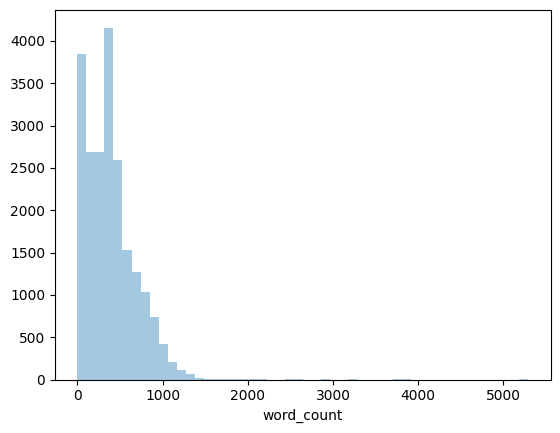

In [15]:
### Adding treu and fake datasets

fin_data = pd.concat([True_data, Fake_data], ignore_index=True)

"""
We use train set to perform exploratory analysis. 
First we want to look at the word count for each 
news and see if there is difference between real 
and fake news.
"""


fin_data['word_count'] = [len(s.split()) for s in fin_data['text']]
#real 
sns.distplot(fin_data['word_count'][fin_data['label'] == 0], kde=False, rug=False)

<AxesSubplot:xlabel='word_count'>

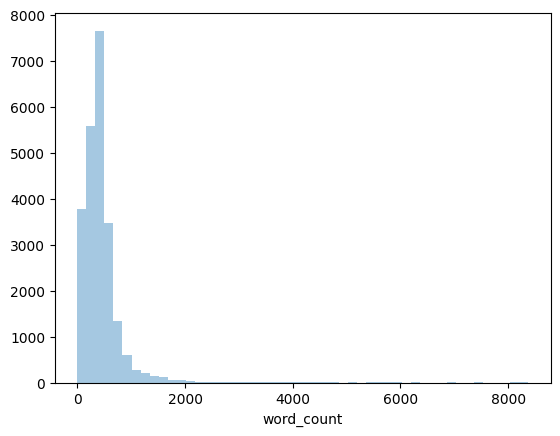

In [16]:
#fake 
sns.distplot(fin_data['word_count'][fin_data['label'] == 1], kde=False, rug=False)

### Word Cloud

In [19]:
"""Next we like to see what are the most common words 
in real/fake news to discover some patterns. 
Word cloud is a popular way to visualize it.
"""
#!pip install wordcloud

from wordcloud import WordCloud

def plot_wordcloud(target,width = 800, height = 400):
    """
    Plot wordcloud of real/fake news
    
    target: real/fake
    width: the width of plotted figure
    height: the height of plotted figure
    """
    if target == 'true':
        t = 0
    elif target == 'fake':
        t = 1
    text = ''
    for t in fin_data['text'][fin_data['label'] == t]:
        text = text + t
    wordcloud = WordCloud(max_font_size=40, min_font_size=20, width=800, height = 400, random_state=0).generate(text)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

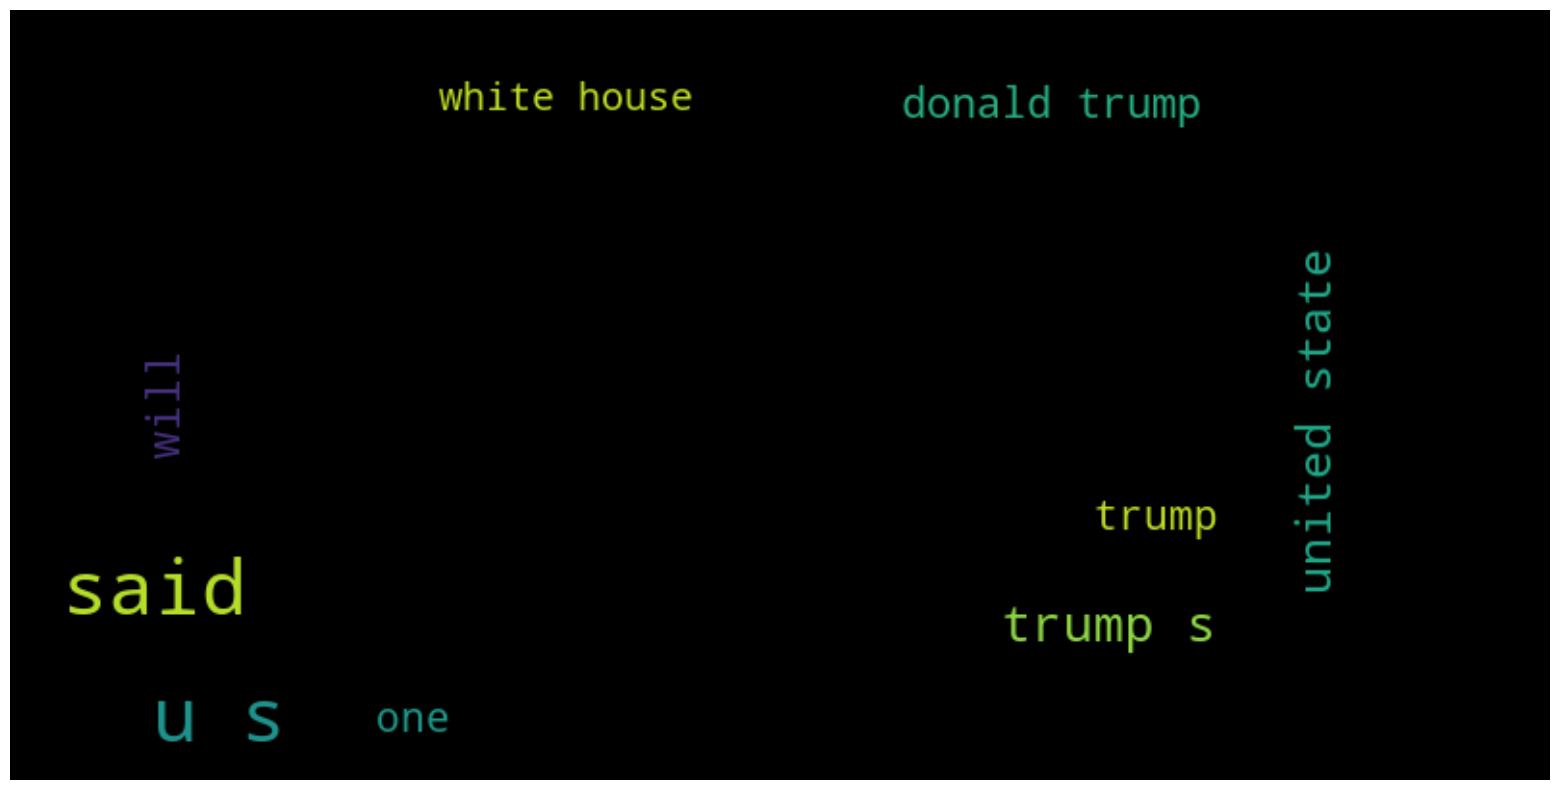

In [20]:
plot_wordcloud('true',width = 800, height = 400)

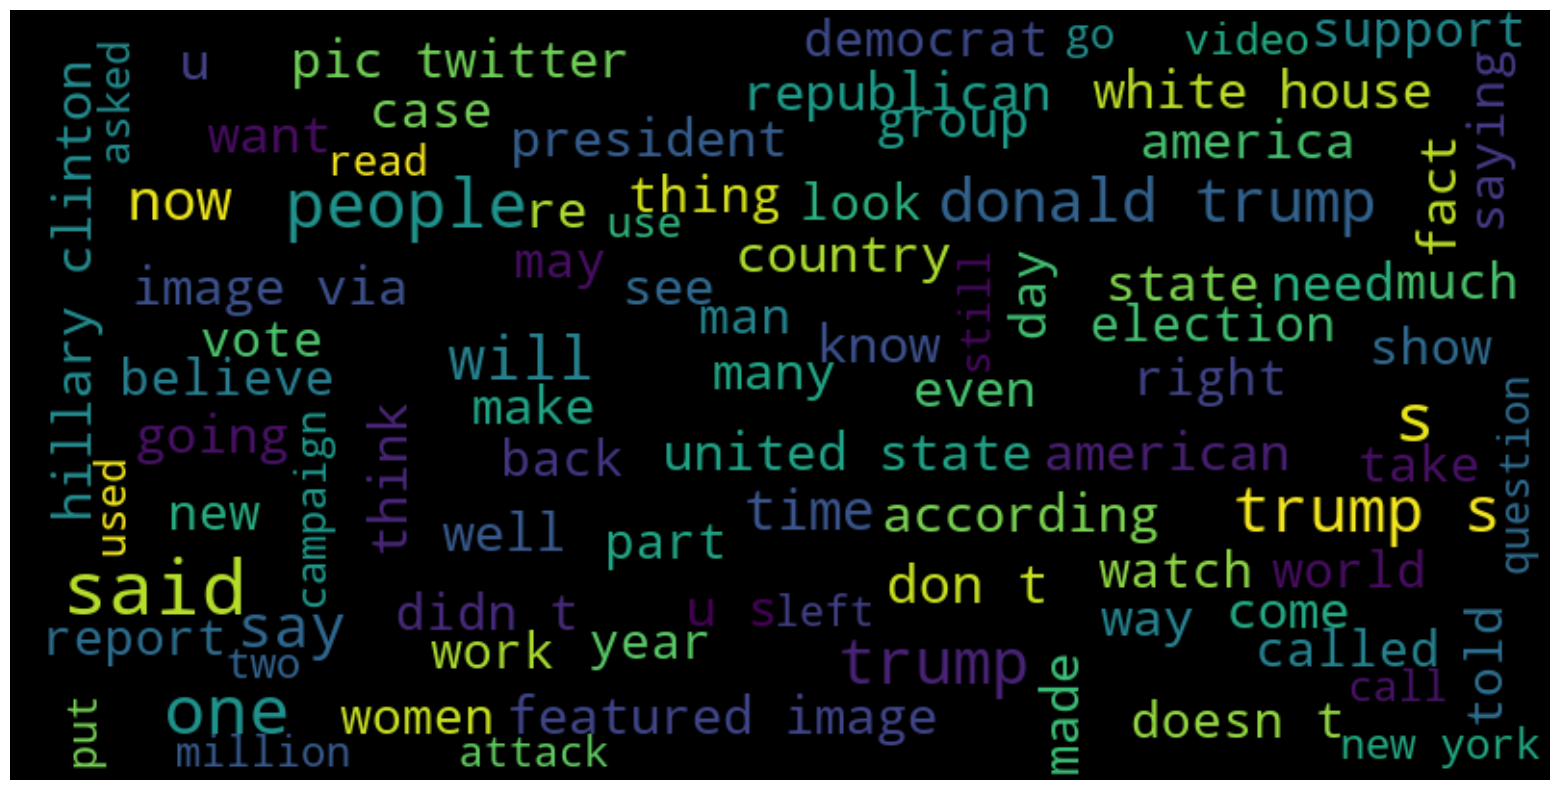

In [21]:
plot_wordcloud('fake',width = 800, height = 400)

### TopK Word Proportion

In [23]:
# how many words in top 10, top 100, and top 1000
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def concat_text(target):
    """
    Concat the news into one large document and split it into a list.
    """
    if target == 'true':
        t = 0
    elif target == 'fake':
        t = 1
        
    text = ''
    for t in fin_data['text'][fin_data['label'] == t]:
        text = text + t
    text = text.split(' ')

    return text

def most_frequent_words(text):
    """
      Calculate and order the vocab by its frequency.
      """
    ngram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), min_df=1)
    X = ngram_vectorizer.fit_transform(text)
    vocab = np.array(list(ngram_vectorizer.get_feature_names()))
    counts = np.array(X.sum(axis=0).A1)
    inds = counts.argsort()[::-1]
    ordered_vocab = vocab[inds]

    return ordered_vocab

C:\Users\com\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


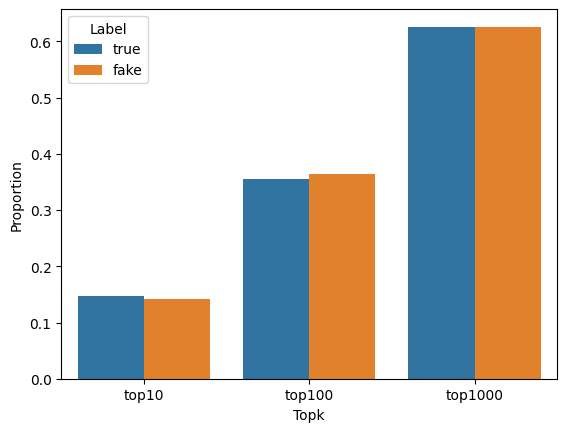

In [24]:
def plot_topK_distribution(k1 = 10, k2 = 100, k3 = 1000):
    """
    Plot the comparison bar chart between real and fake news.

    k1: most common k1 words
    k2: most common k2 words
    k3: most common k3 words
    """
    true_text = concat_text('true')
    fake_text = concat_text('fake')

    true_vocab = most_frequent_words(true_text)
    fake_vocab = most_frequent_words(fake_text)
    
    x = ['top' + str(k1), 'top' + str(k2), 'top' + str(k3)] 
    label = ['true','true','true','fake','fake','fake']
    y = [np.mean([s in true_vocab[1:k1] for s in true_text]),
         np.mean([s in true_vocab[1:k2] for s in true_text]),
         np.mean([s in true_vocab[1:k3] for s in true_text]),
         np.mean([s in fake_vocab[1:k1] for s in fake_text]),
         np.mean([s in fake_vocab[1:k2] for s in fake_text]),
         np.mean([s in fake_vocab[1:k3] for s in fake_text])]

    df = pd.DataFrame(zip(x*2, label, y), columns=["Topk", "Label", "Proportion"])
    sns.barplot(x="Topk", hue="Label", y="Proportion", data=df)
    plt.show()

plot_topK_distribution(k1 = 10, k2 = 100, k3 = 1000)

### Splitting Data to Train/Validation

In [27]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(fin_data, test_size=0.4, random_state=35)
test, val = train_test_split(valid, test_size=0.5, random_state=35)

### Long Document Preprocessing

Since BERT algorithm can only accept sentence length up to 512 words, we need to preprocess our data (long news) in order to feed in to the algorithm. To do so, we follow the idea from the paper and segment each of the text into multiple subtext of no longer than 150 words. The subtexts will have some overlapping, specifically, the last 30 words for first subtext will be the first 30 words of the second subtext.

In [28]:
def get_split(text):
    """
    Split each news text to subtexts no longer than 150 words.
    """
    l_total = []
    l_parcial = []
    if len(text.split())//120 >0:
        n = len(text.split())//120
    else: 
        n = 1
    for w in range(n):
        if w == 0:
            l_parcial = text.split()[:150]
            l_total.append(" ".join(l_parcial))
        else:
            l_parcial = text.split()[w*120:w*120 + 150]
            l_total.append(" ".join(l_parcial))
    return l_total

train['text_split'] = train['text'].apply(get_split)
val['text_split'] = val['text'].apply(get_split)
test['text_split'] = test['text'].apply(get_split)

In [31]:
train.head()

,title,text,subject,date,label,word_count,text_split
31004,INVESTIGATION LAUNCHED: SECOND TRESPASSER May ...,the news that a second man was able to sneak i...,politics,"Oct 27, 2017",1,1017,[the news that a second man was able to sneak ...
3584,"Under U.S. Republican bill, 23 million would l...",washington reuters a bill passed by u s house ...,politicsNews,"May 24, 2017",0,910,[washington reuters a bill passed by u s house...
37553,IRS EXEC LOIS LERNER DEMANDS SECRECY In Law Su...,this is rich lois lerner wants her testimony i...,Government News,"Apr 14, 2017",1,596,[this is rich lois lerner wants her testimony ...
28444,WATCH: Donald Trump Receives Endorsement From...,donald trump has attracted all sorts of fringe...,News,"April 8, 2016",1,325,[donald trump has attracted all sorts of fring...
35645,"IS RESIGNATION OF FBI DIRECTOR IMMINENT, As Ob...",fbi insiders are spreading the word hillary cl...,politics,"Mar 22, 2016",1,569,[fbi insiders are spreading the word hillary c...


In [33]:
train['text_split'][0]

['washington reuters the head of a conservative republican faction in the u s congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in 2018 in keeping with a sharp pivot under way among republicans u s representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional',
 'approach in which republicans will seek to keep control of congress president donald trump and his re

As we can see from above example, a piece of long document is splitted into list of multiple subtexts. Next, we augument our original data into a larger dataset where each row contains a piece of subtext and its corresponding label and index.

In [34]:
def data_augumentation(df, df_name):
    """
    Create a new dataframe from the original one because now one text may contain multiple subtexts of length 200. 
    Text correspond to subtexts from original text, while index correspond to its index of original set.
    """
    text_l = []
    label_l = []
    index_l = []
    for idx,row in df.iterrows():
        for l in row['text_split']:
            text_l.append(l)
            label_l.append(row['label'])
            index_l.append(idx)
    new_df = pd.DataFrame({'text':text_l, 'label':label_l, 'index':index_l})
    print("The " + df_name +" set now has " + str(len(new_df)) + ' subtexts extracted from ' + str(len(df)) + ' texts.')
    return new_df

train_df = data_augumentation(train, df_name = 'training')
val_df = data_augumentation(val, df_name  = 'validation')
test_df = data_augumentation(test, df_name = 'testing')

The training set now has 84558 subtexts extracted from 26938 texts.
The validation set now has 27896 subtexts extracted from 8980 texts.
The testing set now has 28404 subtexts extracted from 8980 texts.


In [48]:
train_df

,text,label,index
0,the news that a second man was able to sneak i...,1,31004
1,trump who had been meeting with lawmakers on c...,1,31004
2,list before tuesday s incident fox news has le...,1,31004
3,but later on officers in a tunnel leading to t...,1,31004
4,attempted to access that facility protester on...,1,31004
...,...,...,...
84553,beijing reuters china called on all parties on...,0,19391
84554,it s really quite ironic that the guy who has ...,1,41911
84555,the raised platform and protect him the democr...,1,41911
84556,washington reuters the u s senate advanced the...,0,5833


In [60]:
import tensorflow_hub as hub
from bert import bert_tokenization
module_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(module_url, trainable=True)

In [96]:
%%time

bert_ckpt_dir="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2"
bert_ckpt_file = bert_ckpt_dir + "bert_model.ckpt"
bert_config_file = bert_ckpt_dir + "bert_config.json"

bert_model_dir="2018_10_18"
bert_model_name="uncased_L-12_H-768_A-12"

!mkdir -p .model .model/$bert_model_name

for fname in ["bert_config.json", "vocab.txt", "bert_model.ckpt.meta", "bert_model.ckpt.index", "bert_model.ckpt.data-00000-of-00001"]:
  cmd = f"gsutil cp gs://bert_models/{bert_model_dir}/{bert_model_name}/{fname} .model/{bert_model_name}"
  !$cmd

!ls -la .model .model/$bert_model_name

bert_ckpt_dir = os.path.join(".model/",bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, "bert_model.ckpt")
bert_config_file = os.path.join(bert_ckpt_dir, "bert_config.json")

The syntax of the command is incorrect.
'gsutil' is not recognized as an internal or external command,
operable program or batch file.
'gsutil' is not recognized as an internal or external command,
operable program or batch file.
'gsutil' is not recognized as an internal or external command,
operable program or batch file.
'gsutil' is not recognized as an internal or external command,
operable program or batch file.
'gsutil' is not recognized as an internal or external command,
operable program or batch file.


CPU times: total: 46.9 ms
Wall time: 127 ms


ls: cannot access '.model': No such file or directory
ls: cannot access '.model/uncased_L-12_H-768_A-12': No such file or directory


In [61]:
# vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
# do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
# tokenizer = bert_tokenization.FullTokenizer(vocab_file, do_lower_case)

# def bert_encode(texts, tokenizer, max_len=512):
#     all_tokens = []
#     all_masks = []
#     all_segments = []
    
#     for text in texts:
#         text = tokenizer.tokenize(text)
            
#         text = text[:max_len-2]
#         input_sequence = ["[CLS]"] + text + ["[SEP]"]
#         pad_len = max_len - len(input_sequence)
        
#         tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
#         pad_masks = [1] * len(input_sequence) + [0] * pad_len
#         segment_ids = [0] * max_len
        
#         all_tokens.append(tokens)
#         all_masks.append(pad_masks)
#         all_segments.append(segment_ids)
    
#     return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [63]:
class FakeNewsData:
    """
    Preprocessing text into BERT features.

    max_seq_len: Maximum sequence length specified
    tokenizer: BERT tokenizer
    """
    DATA_COLUMN = "text"
    LABEL_COLUMN = "label"

    def __init__(self, tokenizer, train, validation, test, max_seq_len = 150):
        self.tokenizer = tokenizer
        self.max_seq_len = max_seq_len
        ((self.train_x, self.train_y),
         (self.val_x, self.val_y),
         (self.test_x, self.test_y)) = map(self._prepare, [train, validation, test])

        ((self.train_x, self.train_x_token_types),
         (self.val_x, self.val_x_token_types),
         (self.test_x, self.test_x_token_types)) = map(self._pad, 
                                                       [self.train_x, self.val_x, self.test_x])

    def _prepare(self, df):
        """
        Add start and end token for each sequence, and convert the text to tokenids.
        """
        x, y = [], []
        with tqdm(total=df.shape[0], unit_scale=True) as pbar:
            for ndx, row in df.iterrows():
                text, label = row[FakeNewsData.DATA_COLUMN], row[FakeNewsData.LABEL_COLUMN]
                tokens = self.tokenizer.tokenize(text)
                tokens = ["[CLS]"] + tokens + ["[SEP]"]
                token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
                self.max_seq_len = max(self.max_seq_len, len(token_ids))
                x.append(token_ids)
                y.append(int(label))
                pbar.update()
        return np.array(x), np.array(y)

    def _pad(self, ids):
        """
        Pad each sequence to the specified max sequence length with [0]
        """
        x, t = [], []
        token_type_ids = [0] * self.max_seq_len
        for input_ids in ids:
            input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
            input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
            x.append(np.array(input_ids))
            t.append(token_type_ids)
        return np.array(x), np.array(t)

In [64]:
%%time
# tokenizer = FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, "vocab.txt"))
data = FakeNewsData(tokenizer, 
                    train = train_df,
                    validation = val_df,
                    test = test_df,
                    max_seq_len= 150)

100%|██████████████████████████████████████████████████████████████████████████████| 84.6k/84.6k [01:50<00:00, 766it/s]
C:\Users\com\AppData\Local\Temp\ipykernel_6412\3931114580.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(x), np.array(y)
100%|██████████████████████████████████████████████████████████████████████████████| 27.9k/27.9k [00:36<00:00, 766it/s]
100%|██████████████████████████████████████████████████████████████████████████████| 28.4k/28.4k [00:37<00:00, 766it/s]


CPU times: total: 3min 7s
Wall time: 3min 8s


### Building BERT Model

In [94]:
def create_model(max_seq_len,lr = 1e-5):
    input_ids = keras.layers.Input(shape=(max_seq_len,), dtype='int32', name="input_ids")
    output = bert_layer(input_ids)

    print("bert shape", output.shape)
    cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(output)
  # Dropout layer
    cls_out = keras.layers.Dropout(0.8)(cls_out)
  # Dense layer with probibility output
    logits = keras.layers.Dense(units=2, activation="softmax")(cls_out)

    model = keras.Model(inputs=input_ids, outputs=logits)
    model.build(input_shape=(None, max_seq_len))

  # load the pre-trained model weights
#     load_stock_weights(bert, bert_ckpt_file)

    model.compile(optimizer=keras.optimizers.Adam(learning_rate = lr),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")])

    model.summary()
        
    return model

In [95]:
max_len = 150
model = create_model(max_seq_len = data.max_seq_len, lr = 1e-5)

ValueError: Exception encountered when calling layer "keras_layer_2" (type KerasLayer).

in user code:

    File "C:\Users\com\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_hub\keras_layer.py", line 237, in call  *
        result = smart_cond.smart_cond(training,

    ValueError: Could not find matching concrete function to call loaded from the SavedModel. Got:
      Positional arguments (3 total):
        * <tf.Tensor 'inputs:0' shape=(None, 351) dtype=int32>
        * False
        * None
      Keyword arguments: {}
    
     Expected these arguments to match one of the following 4 option(s):
    
    Option 1:
      Positional arguments (3 total):
        * [TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/0'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/1'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/2')]
        * False
        * None
      Keyword arguments: {}
    
    Option 2:
      Positional arguments (3 total):
        * [TensorSpec(shape=(None, None), dtype=tf.int32, name='input_word_ids'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='input_mask'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='input_type_ids')]
        * True
        * None
      Keyword arguments: {}
    
    Option 3:
      Positional arguments (3 total):
        * [TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/0'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/1'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/2')]
        * True
        * None
      Keyword arguments: {}
    
    Option 4:
      Positional arguments (3 total):
        * [TensorSpec(shape=(None, None), dtype=tf.int32, name='input_word_ids'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='input_mask'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='input_type_ids')]
        * False
        * None
      Keyword arguments: {}


Call arguments received by layer "keras_layer_2" (type KerasLayer):
  • inputs=tf.Tensor(shape=(None, 351), dtype=int32)
  • training=False

In [92]:
import datetime

def model_fitting(max_epoch = 5, patience = 1):
    """
    Function to fit the model to training set. Validation set are used to find the optimal training epochs.
    Model will stop training when validation accuracy don't improve for a number of epochs. Then the model will restore weights to its best validation performance.

    max_epoch: Maximum number of epochs to train
    patience: Number of non-improving epochs before model stops
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', 
                                                    save_best_only=True, verbose=1)
    earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)
    model.fit(x=data.train_x, y=data.train_y,
              validation_data = (data.val_x,data.val_y),
              batch_size=16,
              shuffle=True,
              epochs=max_epoch,
              callbacks=[checkpoint, earlystopping])
    return model

model1 = model_fitting(max_epoch = 5, patience = 1)
# Save the optimal weights for future usage
model1.save_weights('bert_news.h5', overwrite=True)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\com\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\com\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\com\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\com\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\com\anaconda3\envs\tf_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\com\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "model_1" expects 3 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 351) dtype=int32>]


In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

train_history = model.fit(
    train_input, train_labels, 
    validation_split=0.2,
    epochs=3,
    callbacks=[checkpoint, earlystopping],
    batch_size=32,
    verbose=1

In [ ]:
model.load_weights('model.h5')
test_pred = model.predict(test_input)